In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Classified Data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [4]:
from sklearn.preprocessing import StandardScaler
# standardizes data whic can cause biasness in the model
std = StandardScaler()
std.fit(df.drop("TARGET", axis=1))
# fit claculates mean and std of data given
scaled=std.transform(df.drop("TARGET", axis=1))
# transform scales data using calculated mean and std and applies to the data

df_scaled=pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [5]:
x=df_scaled
y=df['TARGET']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

KNN= KNeighborsClassifier()

KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred=KNN.predict(x_test)
KNN.score(x_test, y_test)

0.9133333333333333

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       157
           1       0.90      0.92      0.91       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [9]:
print(confusion_matrix(y_test, y_pred))

[[143  14]
 [ 12 131]]


In [10]:
# If model can be improved using hyperparamters(n_neighbors)
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred=knn.predict(x_test)
  error_rate.append(np.mean(pred != y_test))


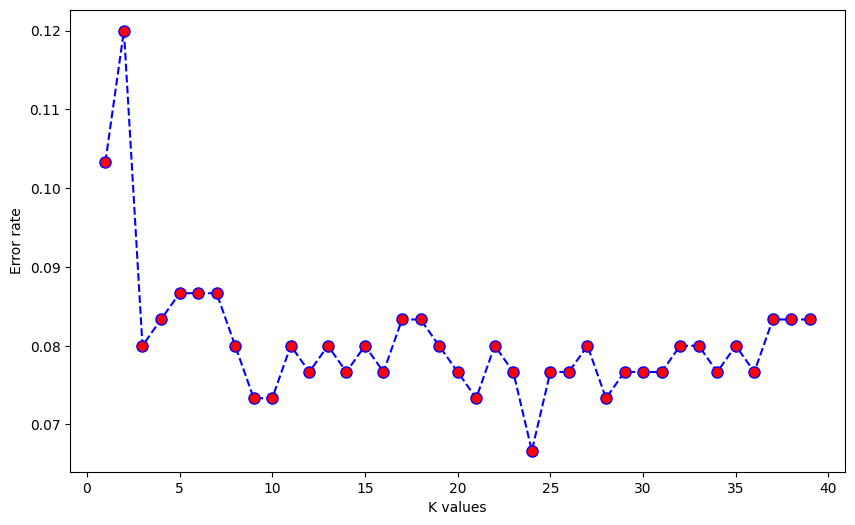

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker='o', markerfacecolor="red", markersize=8);
plt.xlabel("K values");
plt.ylabel("Error rate");

In [12]:
knn1=KNeighborsClassifier(n_neighbors=24)
knn1.fit(x_train, y_train)
pred1=knn1.predict(x_test)

print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       157
           1       0.92      0.94      0.93       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [13]:
print(confusion_matrix(y_test, pred1))

[[146  11]
 [  9 134]]


# **DIY Project**

In [15]:
data=pd.read_csv('/content/KNN_Project_Data.csv')
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742175,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [16]:
len(data)

1000

In [22]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()

scaled=stand.fit_transform(data.drop("TARGET CLASS", axis=1))
data_scaled=pd.DataFrame(scaled, columns=data.columns[: -1])
data_scaled

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [23]:
x=data_scaled
y=data["TARGET CLASS"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=5)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()

kn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
y_predict=kn.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       145
           1       0.81      0.80      0.81       155

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

[[116  29]
 [ 31 124]]


In [30]:
error=[]
for i in range(1, 40):
  kn2=KNeighborsClassifier(n_neighbors=i)
  kn2.fit(x_train, y_train)
  y_predict2=kn2.predict(x_test)
  error.append(np.mean(y_predict2 != y_test))


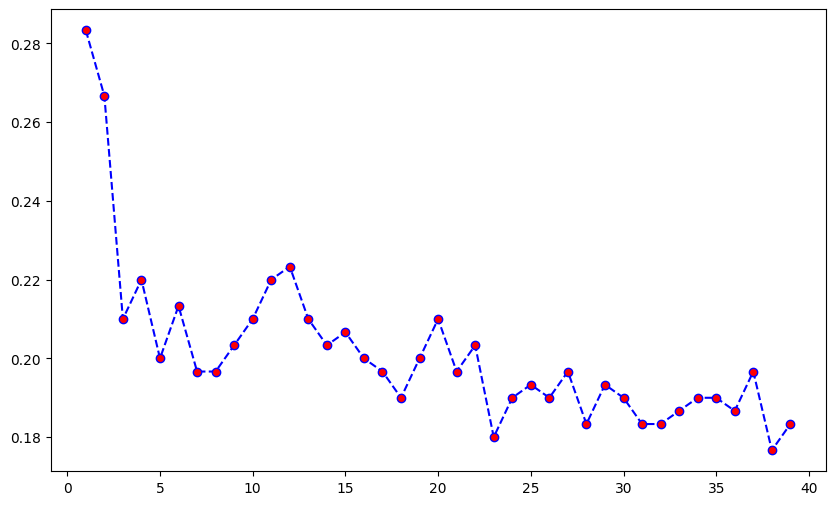

In [32]:
plt.figure(figsize=(10, 6))

plt.plot(range(1,40), error, color="blue", linestyle="--", marker="o", markerfacecolor="red")

In [35]:
kn3=KNeighborsClassifier(n_neighbors=23)
kn3.fit(x_train, y_train)
y_pre=kn3.predict(x_test)

print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       145
           1       0.83      0.82      0.82       155

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

[[119  26]
 [ 28 127]]
